In [ ]:
!python3 --version

Python 3.7.13


```shell
!update-alternatives --install /usr/bin/python python /usr/bin/python3.7 1

!update-alternatives --list python

!sudo update-alternatives --config python

!sudo update-alternatives --set python /usr/bin/python3.7



In [ ]:
!sudo apt install libspatialindex-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex4v5
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 555 kB of archives.
After this operation, 3,308 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex4v5 amd64 1.8.5-5 [219 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-c4v5 amd64 1.8.5-5 [51.7 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatialindex-dev amd64 1.8.5-5 [285 kB]
Fetched 555 kB in 2s (315 kB/s)
debconf: unable to initialize frontend: Dialog
deb

In [ ]:

!pip install pyinterpolate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.4 MB/s 
     |████████████████████████████████| 75 kB 4.1 MB/s 
     |████████████████████████████████| 27.4 MB 2.7 MB/s 
     |████████████████████████████████| 10.3 MB 14.1 MB/s 
     |████████████████████████████████| 15.3 MB 33.6 MB/s 
     |████████████████████████████████| 994 kB 41.5 MB/s 
     |████████████████████████████████| 1.0 MB 48.6 MB/s 
     |████████████████████████████████| 17.8 MB 208 kB/s 
     |████████████████████████████████| 6.6 MB 27.0 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: shapely
    Found existing installation: Shapely 1.8.2
    Uninstalling Shapely-1.8.2:
      Successfully uninstalled Shapely-1.8.2
  Attempting uninstall: matplotlib
    Found existing installation: matplo

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd

from pyinterpolate.semivariance import calculate_semivariance  # experimental semivariogram
from pyinterpolate.semivariance import TheoreticalSemivariogram  # theoretical models
from pyinterpolate.kriging import Krige
from shapely.geometry import Point

import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_geopython_2022/meuse.csv')

In [ ]:
# Get only x, y and zinc concentration columns

df = df[['x', 'y', 'zinc']]

In [ ]:
# Transform zinc column

df['zinc'] = np.log(df['zinc'])

# Take a look into dataset

df.head()

,x,y,zinc
0,181072,333611,6.929517
1,181025,333558,7.039660
2,181165,333537,6.461468
3,181298,333484,5.549076
4,181307,333330,5.594711


In [ ]:
# Calculate experimental variogram

In [ ]:
# wrong

step = 3000
max_r = 160000
variogram = calculate_semivariance(df.values, step_size=step, max_range=max_r)

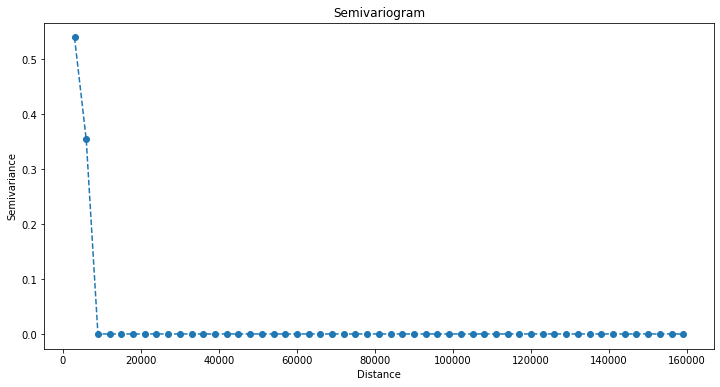

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(variogram[:, 0], variogram[:, 1], '--o')
plt.title('Semivariogram')
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()


In [ ]:
# wrong

step = 20
max_r = 1600
variogram = calculate_semivariance(df.values, step_size=step, max_range=max_r)

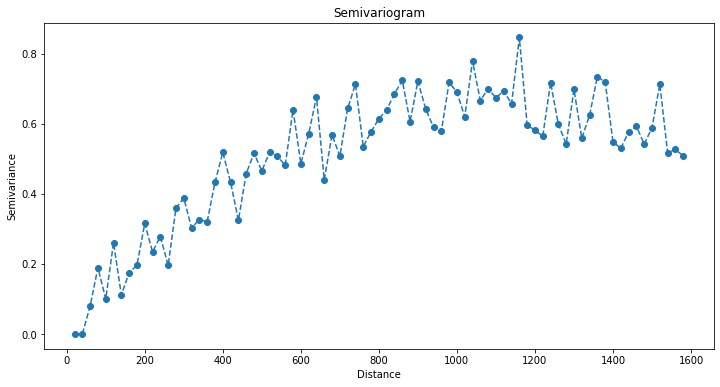

In [ ]:
# Plot experimental semivariograms

plt.figure(figsize=(12, 6))
plt.plot(variogram[:, 0], variogram[:, 1], '--o')
plt.title('Semivariogram')
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()


In [ ]:
step = 100
max_r = 1600
variogram = calculate_semivariance(df.values, step_size=step, max_range=max_r)

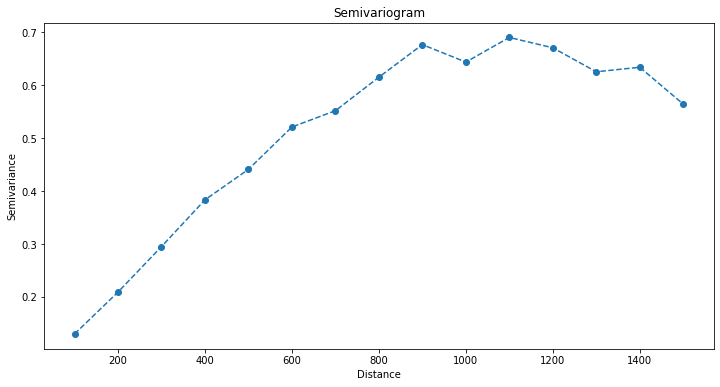

In [ ]:
# Plot experimental semivariograms

plt.figure(figsize=(12, 6))
plt.plot(variogram[:, 0], variogram[:, 1], '--o')
plt.title('Semivariogram')
plt.xlabel('Distance')
plt.ylabel('Semivariance')
plt.show()



In [ ]:
number_of_rngs = 64


theo_pyint = TheoreticalSemivariogram(
    points_array=df.values,
    empirical_semivariance=variogram
    )

opt_pyint = theo_pyint.find_optimal_model(
    number_of_ranges=number_of_rngs,
    number_of_sill_ranges=number_of_rngs
    )

print(f'Optimal model is {opt_pyint}')

Optimal model is spherical


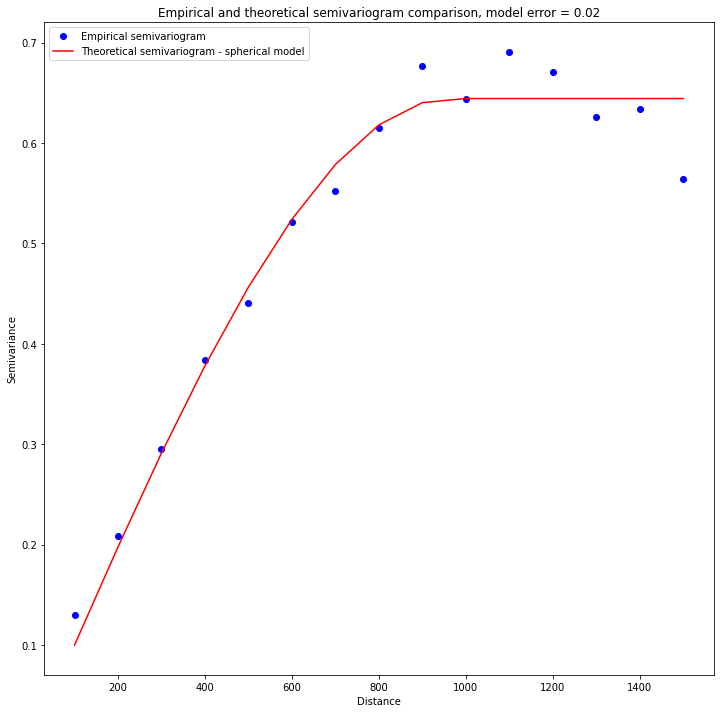

In [ ]:
# Show pyinterpolate semivariogram

theo_pyint.show_semivariogram()



In [ ]:
# Initialize Kriging model

model = Krige(semivariogram_model=theo_pyint, known_points=df.values)



In [ ]:
unknown = df.sample().values[0]
unknown_val = unknown[-1]
unknown_loc = unknown[:-1]
nn = 32
nmin = 8



In [ ]:
ok_pred = model.ordinary_kriging(unknown_location=unknown_loc,
                                 max_no_neighbors=nn)

In [ ]:
ok_pred

(5.365976015021851,
 0.0,
 0.0,
 array([ 1., -0., -0.,  0., -0.,  0., -0., -0.,  0., -0., -0.,  0., -0.,
         0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,
        -0., -0., -0., -0., -0., -0.,  0.]))

In [ ]:
np.equal(ok_pred[0], unknown_val)

True

In [ ]:


# Read point grid

data = pd.read_csv('/content/drive/MyDrive/data_geopython_2022/meuse_grid.csv')
data = data[['x', 'y']].values

interpolated_results = []

In [ ]:
model_pyint = Krige(semivariogram_model=theo_pyint, known_points=df.values)

In [ ]:
for pt in data:
    try:
        pred, err = model_pyint.ordinary_kriging(unknown_location=pt,
                                                 max_no_neighbors=nn,
                                                 min_no_neighbors=nmin)[:2]
    except ValueError:
        pred, err = np.nan, np.nan
        
    interpolated_results.append([pt[0], pt[1], pred, err])
    
predictions = gpd.GeoDataFrame(interpolated_results,
                               columns=['x', 'y', 'pred', 'err'])



In [ ]:
predictions.head()

,x,y,pred,err
0,181180,333740,6.572385,0.269877
1,181140,333700,6.678927,0.188833
2,181180,333700,6.554470,0.213742
3,181220,333700,6.439491,0.241063
4,181100,333660,6.831834,0.103079


In [ ]:
predictions['geometry'] = gpd.points_from_xy(predictions['x'], predictions['y'])
predictions.set_geometry('geometry', inplace=True)

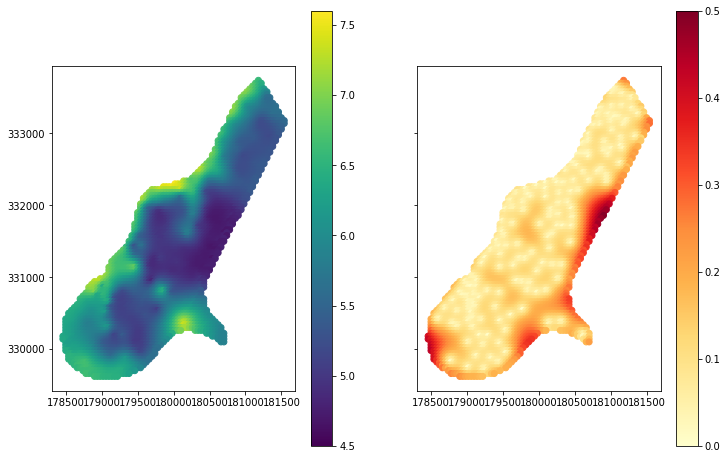

In [ ]:
fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(12, 8))
predictions.plot(ax=axes[0], column='pred', legend=True, vmin=4.5, vmax=7.6)
predictions.plot(ax=axes[1], column='err', cmap='YlOrRd', legend=True, vmin=0, vmax=0.5)
plt.show()